In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(25,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 25)                135225    
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 135,805
Trainable params: 135,805
Non-trainable params: 0
__________________________________________________

In [9]:
batch_size = 16
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 18s 326us/sample - loss: 0.2185 - accuracy: 0.9205 - val_loss: 0.0533 - val_accuracy: 0.9872
Epoch 2/10
54000/54000 [==============================] - 17s 314us/sample - loss: 0.2102 - accuracy: 0.9231 - val_loss: 0.0584 - val_accuracy: 0.9872
Epoch 3/10
54000/54000 [==============================] - 17s 314us/sample - loss: 0.2062 - accuracy: 0.9245 - val_loss: 0.0580 - val_accuracy: 0.9860
Epoch 4/10
54000/54000 [==============================] - 22s 413us/sample - loss: 0.2029 - accuracy: 0.9265 - val_loss: 0.0586 - val_accuracy: 0.9868
Epoch 5/10
54000/54000 [==============================] - 25s 468us/sample - loss: 0.1962 - accuracy: 0.9288 - val_loss: 0.0621 - val_accuracy: 0.9862
Epoch 6/10
54000/54000 [==============================] - 26s 488us/sample - loss: 0.1931 - accuracy: 0.9288 - val_loss: 0.0553 - val_accuracy: 0.9878
Epoch 7/10
54000/54000 [=====================

In [22]:
model.save('cnn_mnist.h5')

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.061798695719637906
Test accuracy: 0.9835


In [6]:
model = keras.models.load_model('cnn_mnist.h5')

In [17]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import time
sns.set_theme()

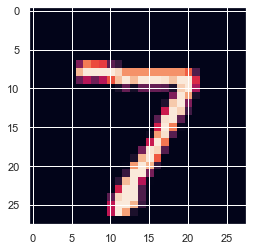

In [27]:
plt.imshow(np.array(x_test[0]).reshape(28,28))

In [23]:
# VISUALIZATION

In [7]:
from keract import get_activations, display_activations,display_heatmaps

Run it without eager mode. Paste those commands at the beginning of your script:
> import tensorflow as tf
> tf.compat.v1.disable_eager_execution()
input_3 (1, 28, 28, 1) 


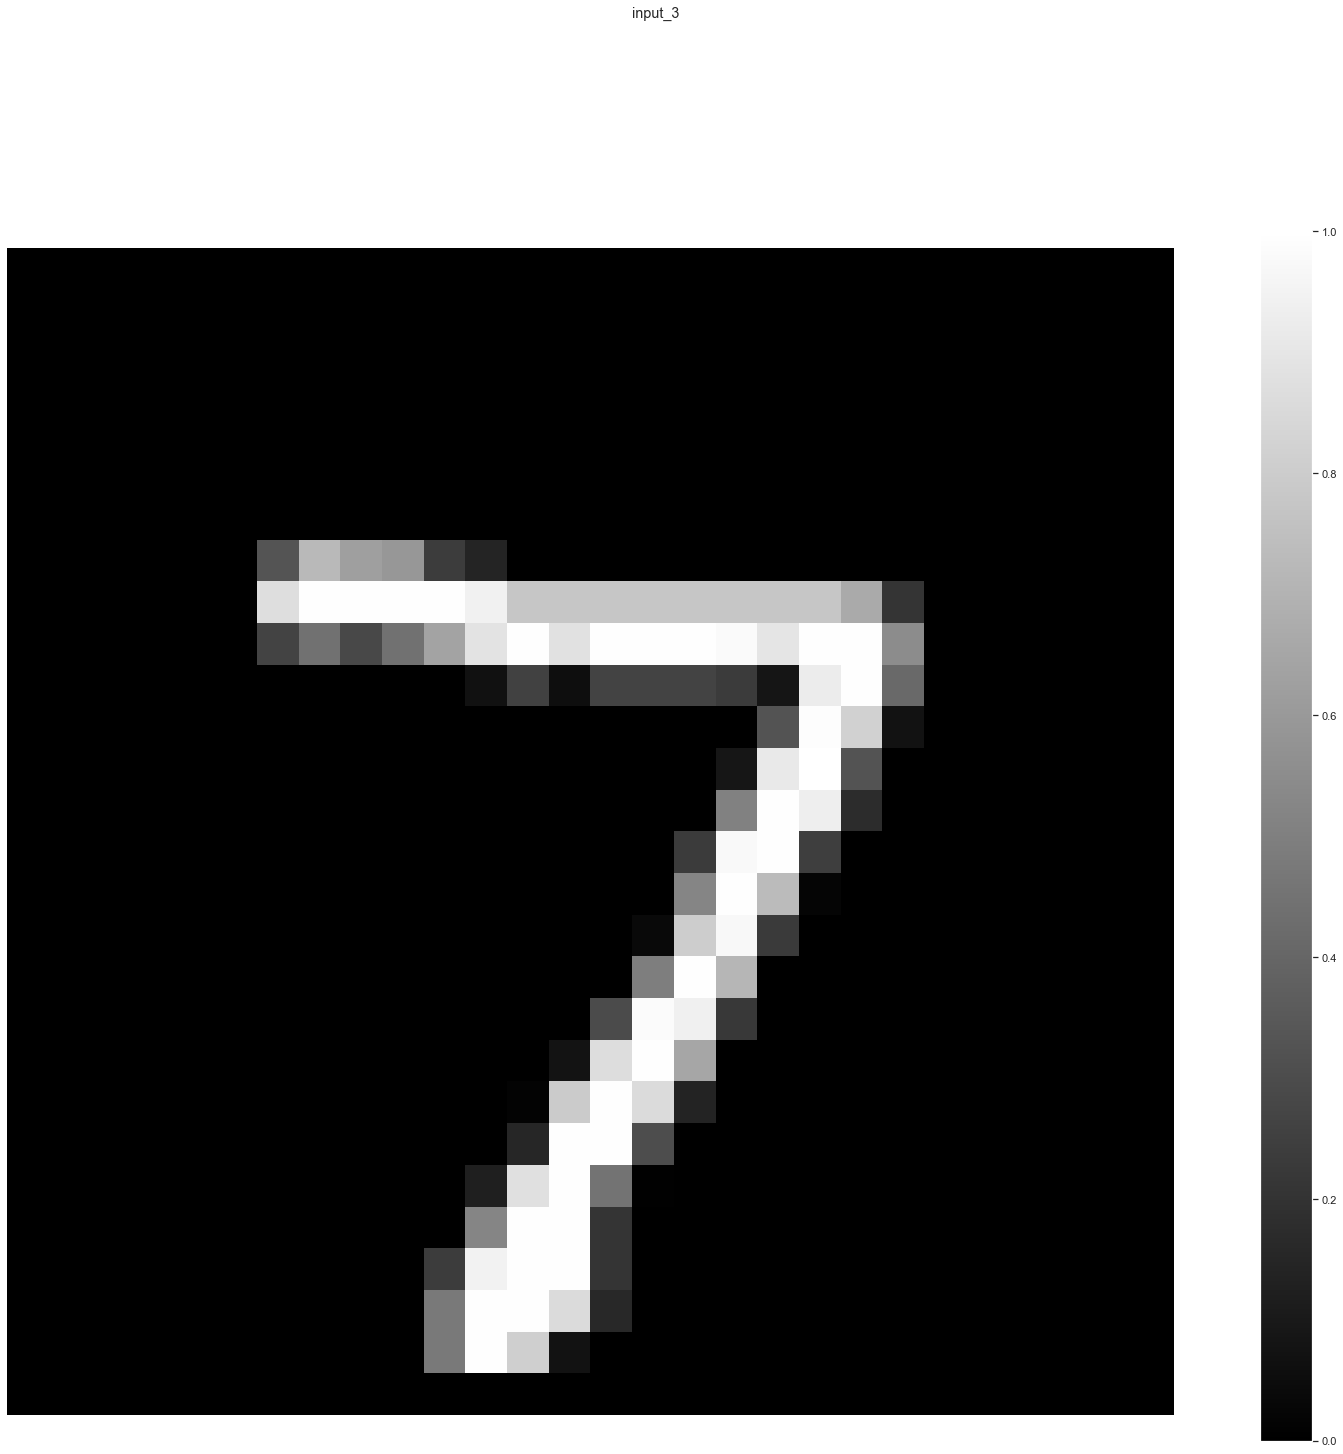

conv2d_5 (1, 26, 26, 32) 


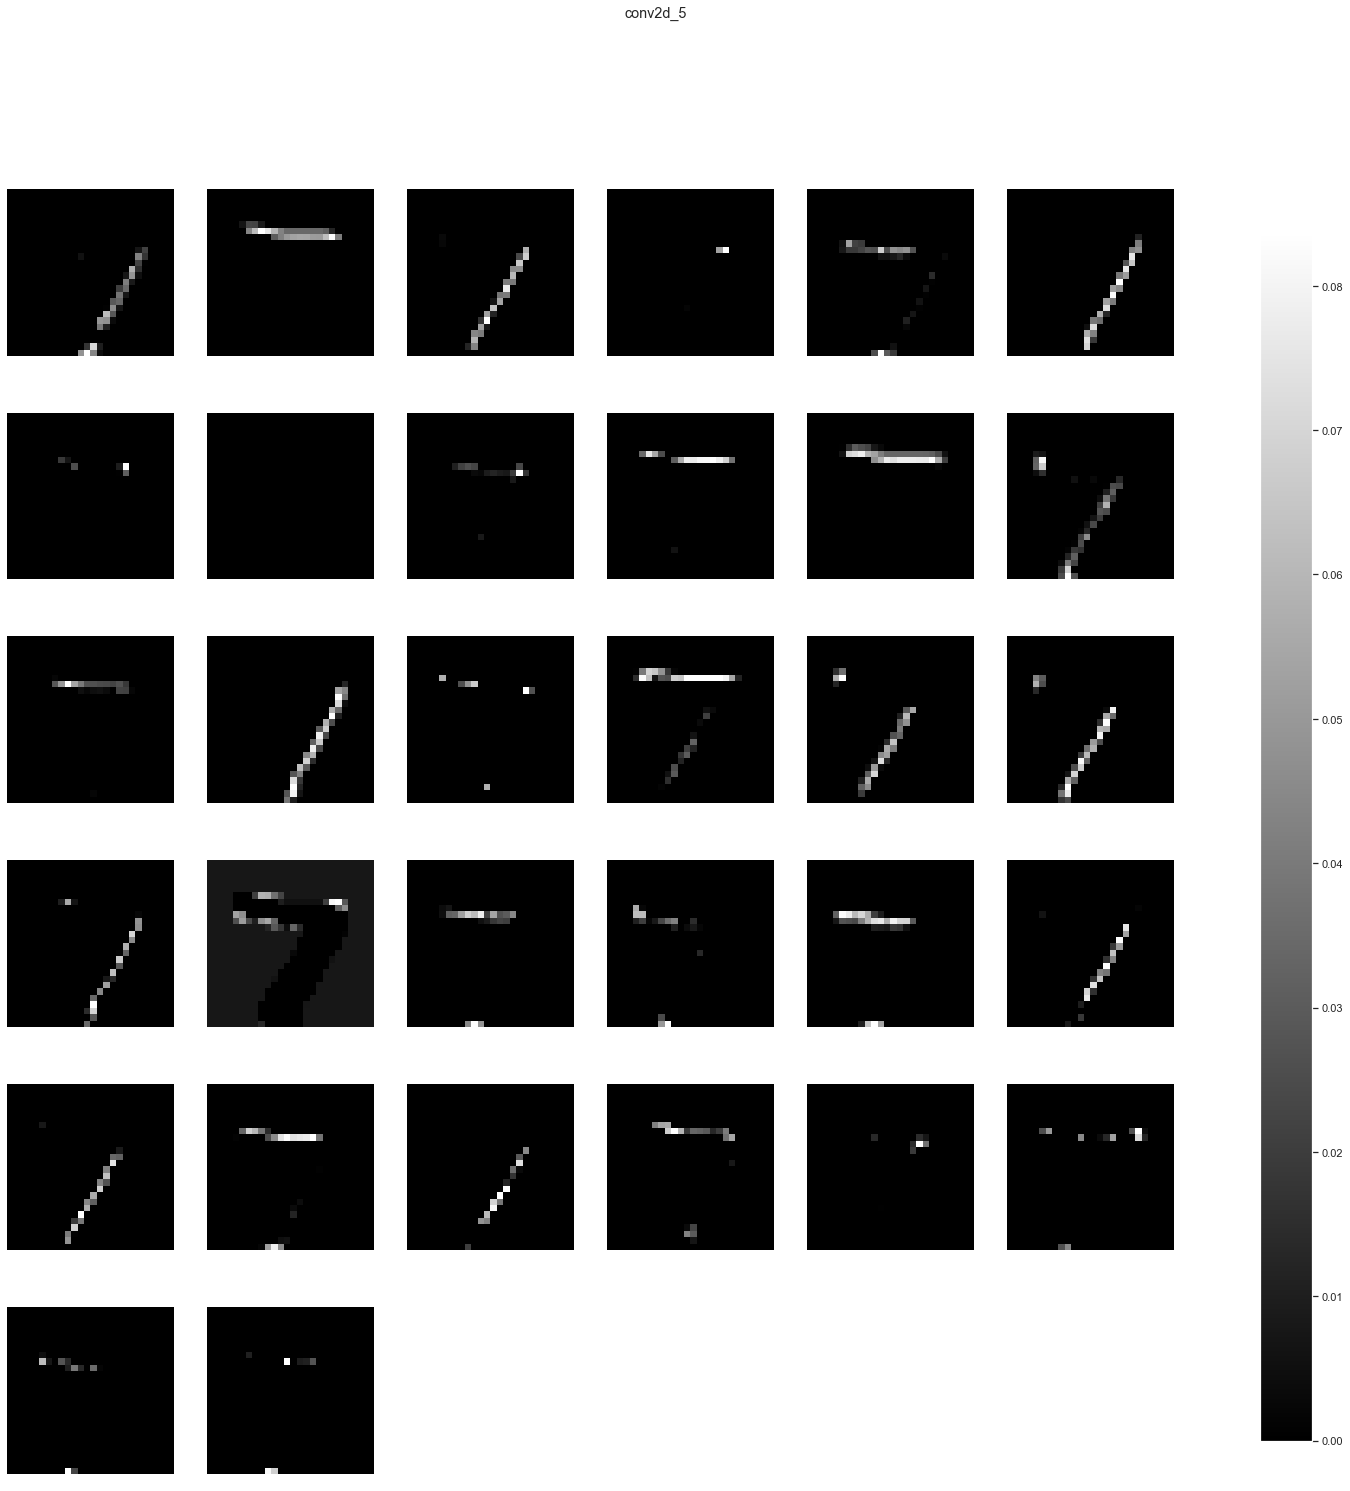

max_pooling2d_5 (1, 13, 13, 32) 


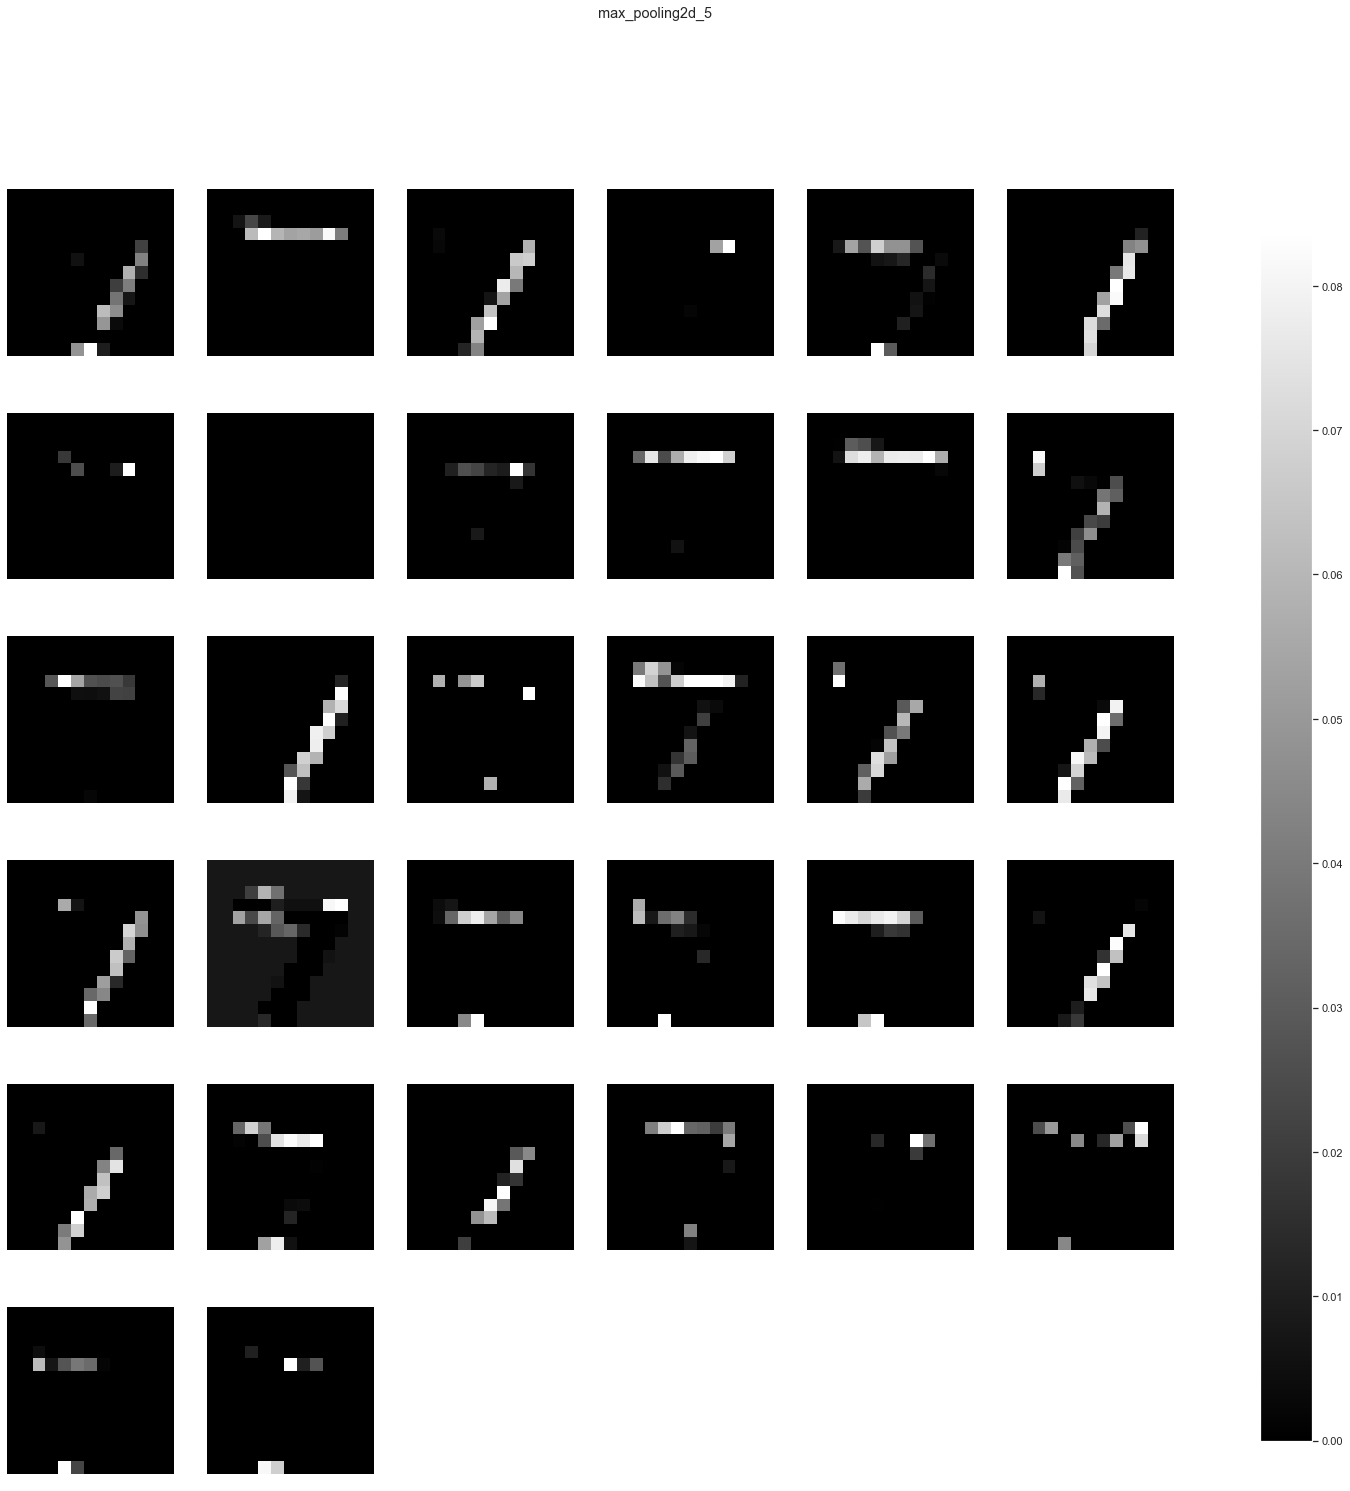

flatten_4 (1, 5408) 


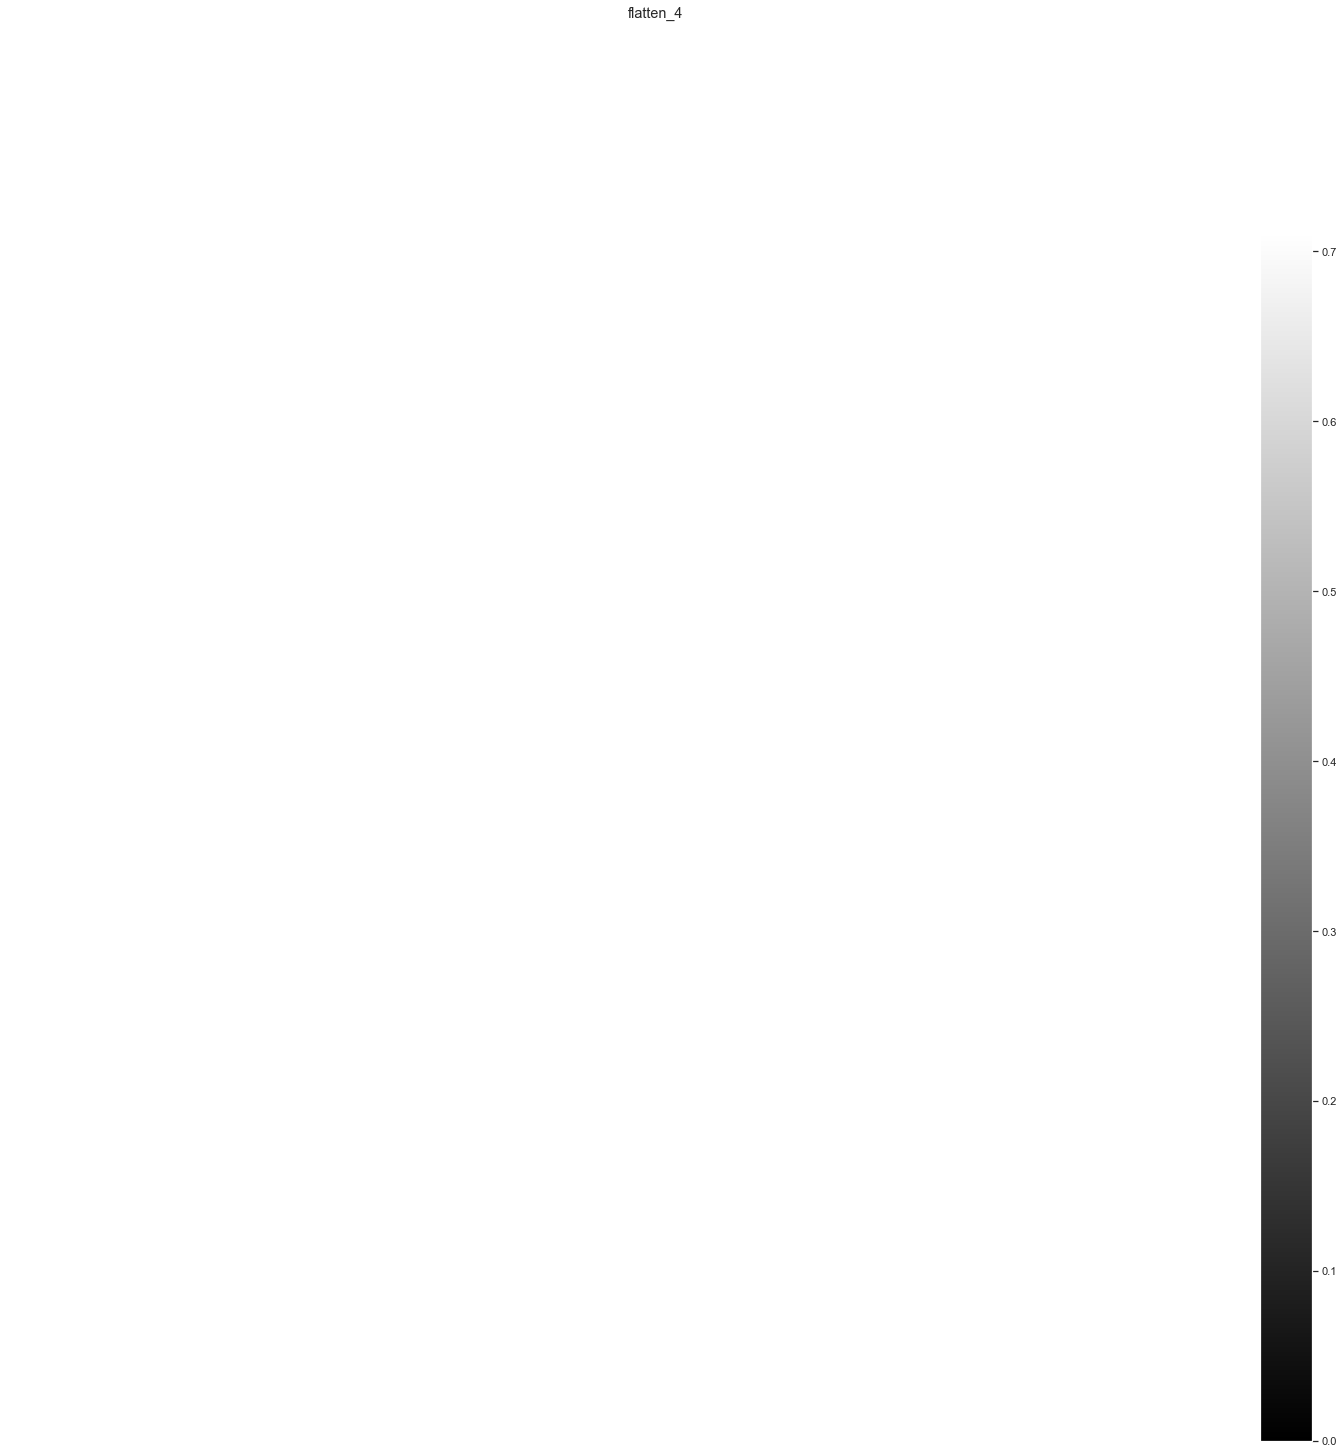

dense_7 (1, 25) 


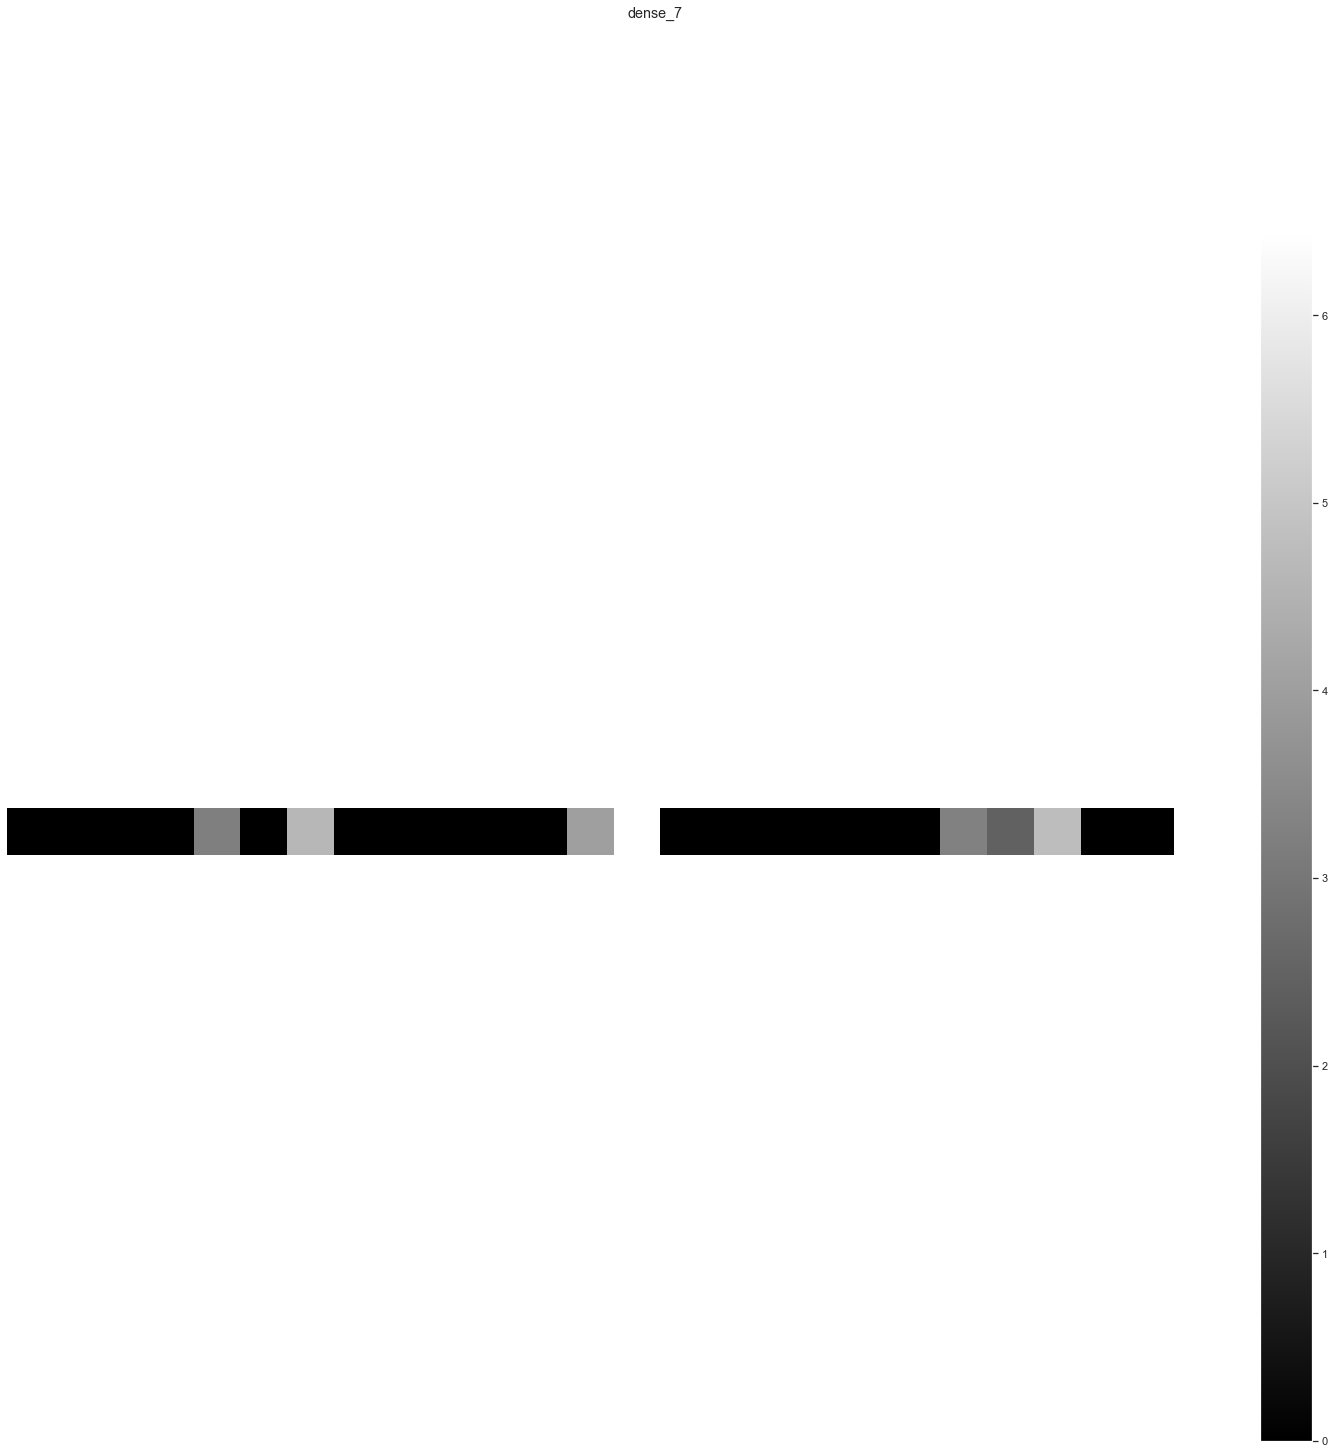

dropout_2 (1, 25) 


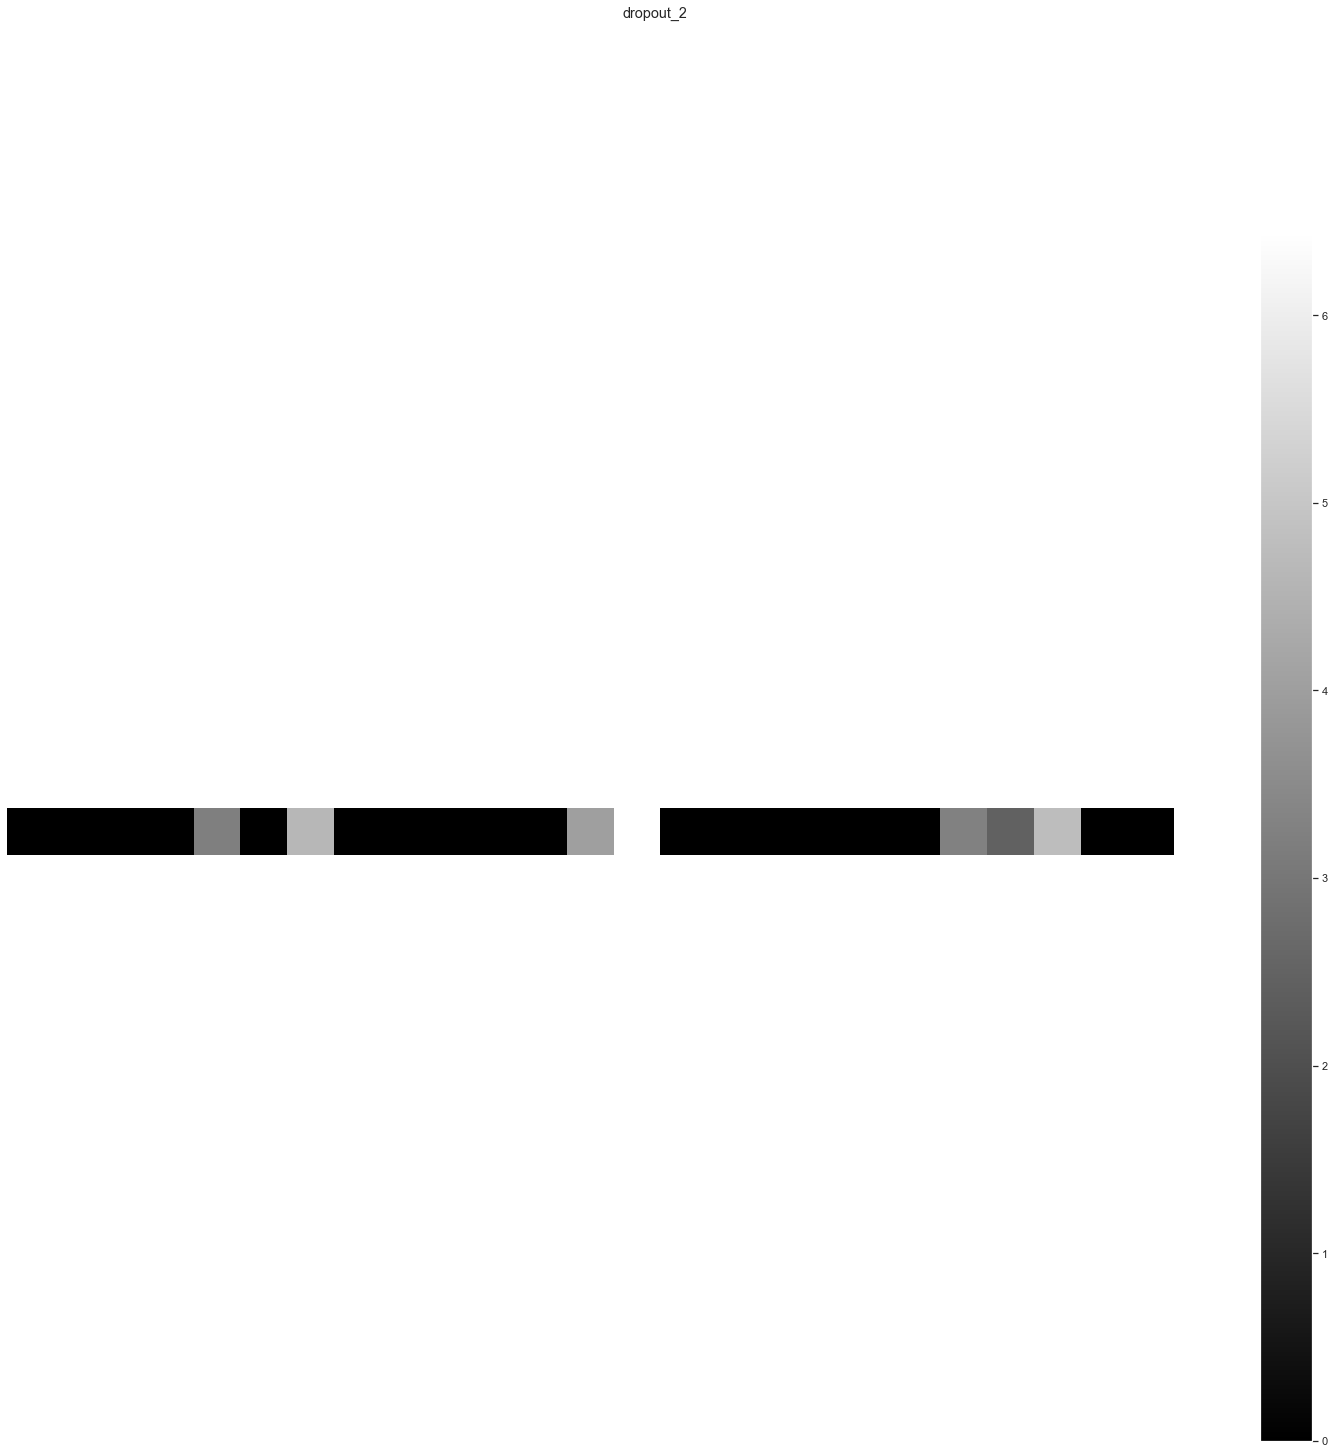

dense_8 (1, 10) 


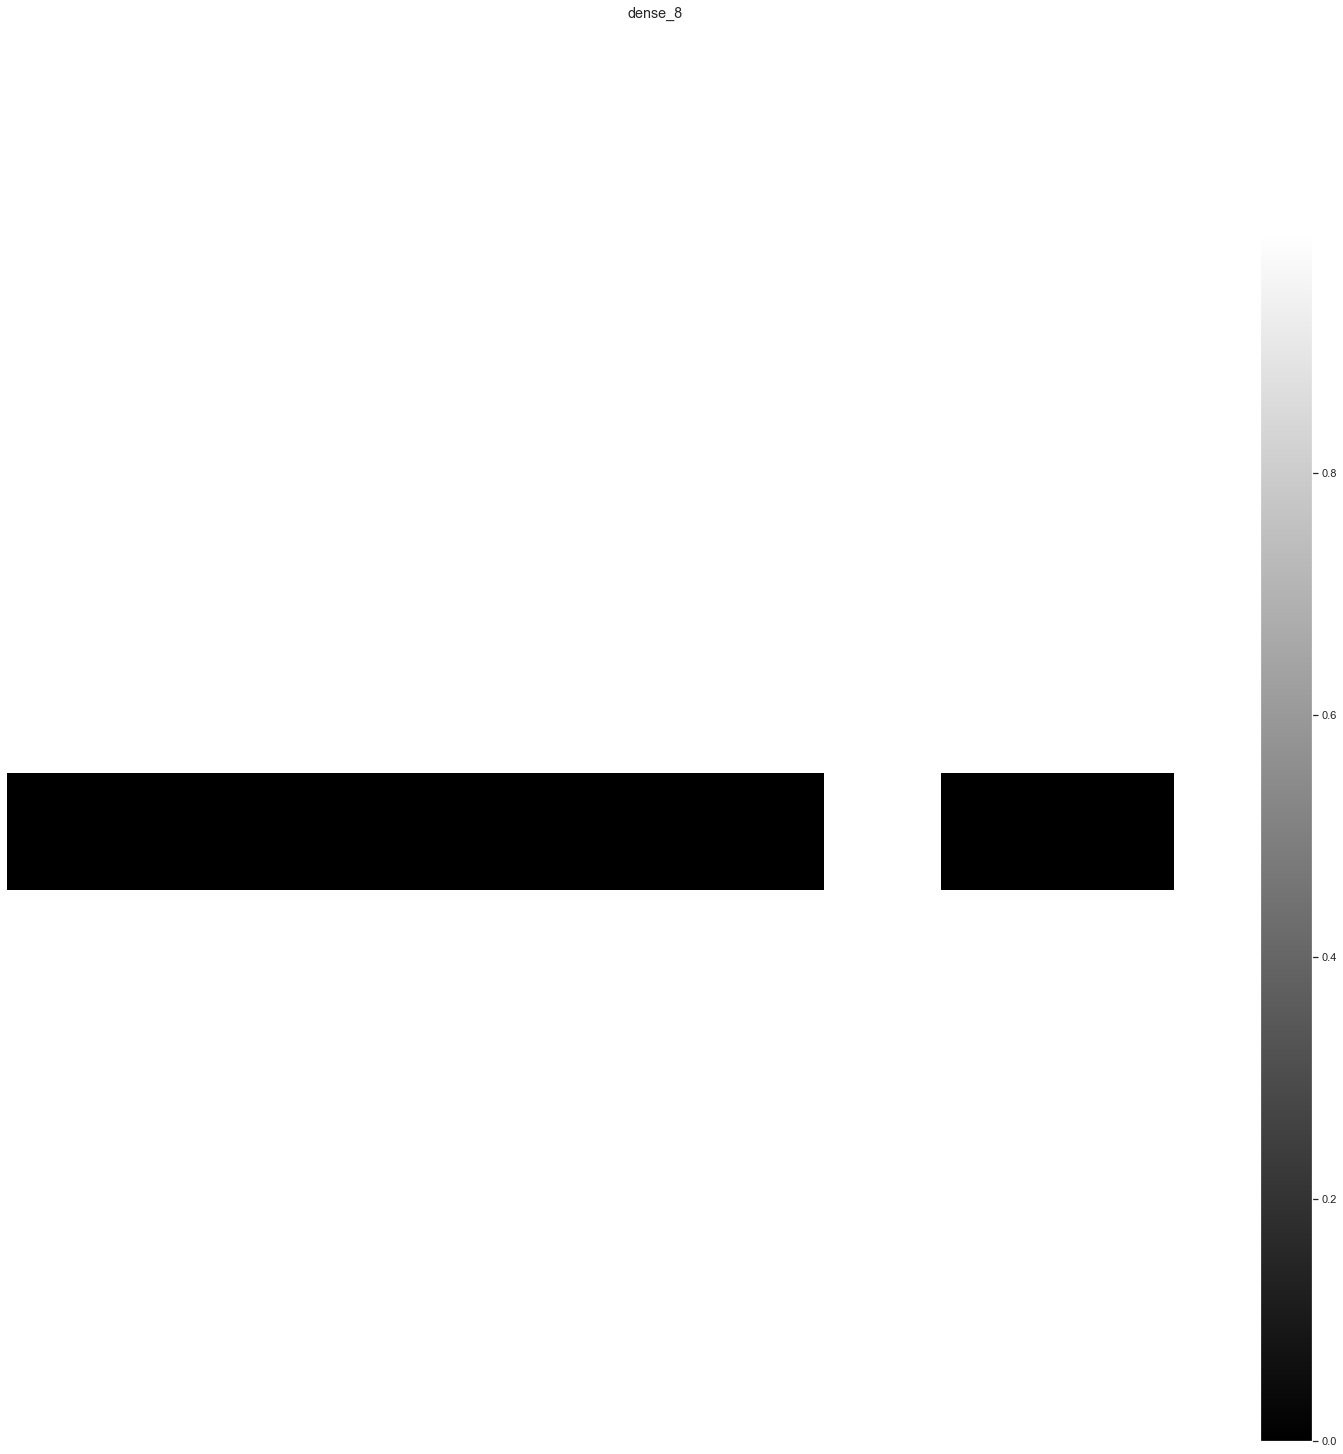

In [27]:
keract_inputs = x_test[:1]
keract_targets = y_test[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

input_3 (1, 28, 28, 1) 


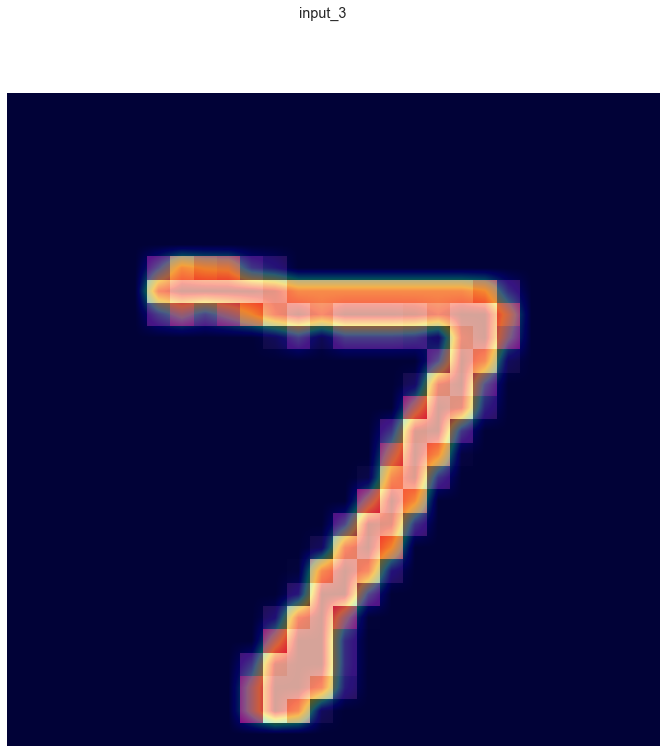

conv2d_5 (1, 26, 26, 32) 


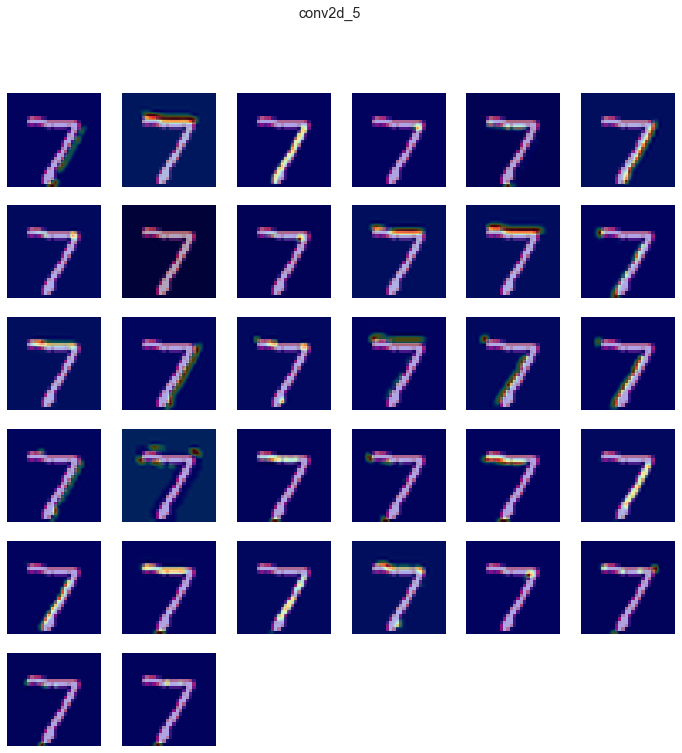

max_pooling2d_5 (1, 13, 13, 32) 


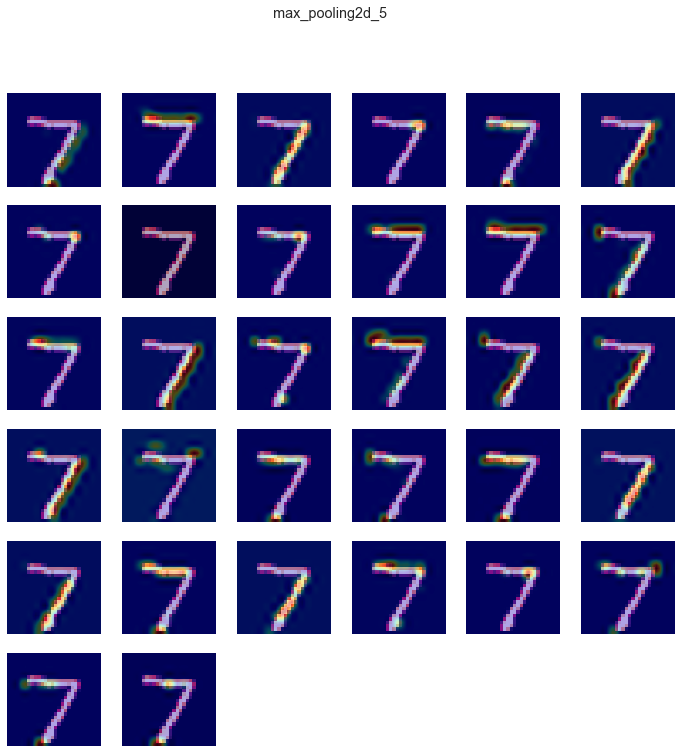

flatten_4 (1, 5408) -> Skipped. 2D Activations.
dense_7 (1, 25) -> Skipped. 2D Activations.
dropout_2 (1, 25) -> Skipped. 2D Activations.
dense_8 (1, 10) -> Skipped. 2D Activations.


In [30]:
display_heatmaps(activations, keract_inputs, save=False)

In [14]:
x_test[:1].shape

(1, 28, 28, 1)

In [15]:
activations = keras.Model(inputs=model.input,outputs=[layer.output for layer in model.layers])
act = activations.predict(x_test[:1].reshape((1,28,28,1)))

In [20]:
model.layers

In [21]:
act[1].shape

(1, 13, 13, 32)

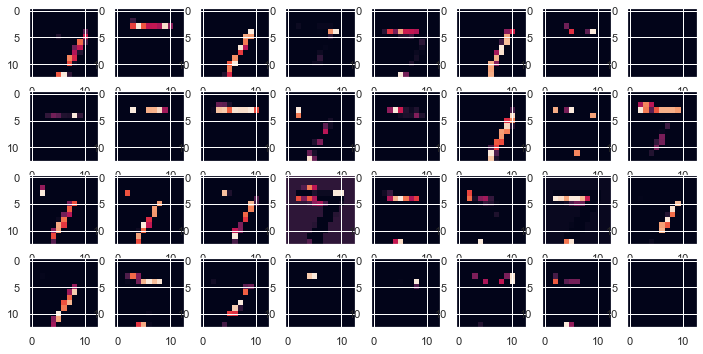

In [23]:
plt.figure(figsize=(12,12))
for i in range(32):
    plt.subplot(8,8,i+1)
    plt.imshow(act[1][0,:,:,i])
plt.savefig("rep.png",dpi=1200)

In [24]:
print(model.layers[1].name)

max_pooling2d_5


In [28]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(25,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                135225    
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
Total params: 135,645
Trainable params: 135,645
Non-trainable params: 0
________________________________________________

In [29]:
batch_size = 16
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 18s 326us/sample - loss: 0.7215 - accuracy: 0.7489 - val_loss: 0.1208 - val_accuracy: 0.9677
Epoch 2/10
54000/54000 [==============================] - 17s 309us/sample - loss: 0.4667 - accuracy: 0.8377 - val_loss: 0.0973 - val_accuracy: 0.9762
Epoch 3/10
54000/54000 [==============================] - 17s 307us/sample - loss: 0.4157 - accuracy: 0.8554 - val_loss: 0.0828 - val_accuracy: 0.9773
Epoch 4/10
54000/54000 [==============================] - 17s 307us/sample - loss: 0.3866 - accuracy: 0.8645 - val_loss: 0.0828 - val_accuracy: 0.9787
Epoch 5/10
54000/54000 [==============================] - 19s 348us/sample - loss: 0.3533 - accuracy: 0.8749 - val_loss: 0.0835 - val_accuracy: 0.9780
Epoch 6/10
54000/54000 [==============================] - 22s 408us/sample - loss: 0.3329 - accuracy: 0.8830 - val_loss: 0.0793 - val_accuracy: 0.9815
Epoch 7/10
54000/54000 [=====================

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07901387938763946
Test accuracy: 0.9768


In [31]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(25,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                115225    
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                260       
Total params: 116,029
Trainable params: 116,029
Non-trainable params: 0
________________________________________________

In [32]:
batch_size = 16
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 19s 349us/sample - loss: 0.6080 - accuracy: 0.7838 - val_loss: 0.0937 - val_accuracy: 0.9755
Epoch 2/10
54000/54000 [==============================] - 25s 459us/sample - loss: 0.3690 - accuracy: 0.8643 - val_loss: 0.0654 - val_accuracy: 0.9817
Epoch 3/10
54000/54000 [==============================] - 25s 470us/sample - loss: 0.3223 - accuracy: 0.8848 - val_loss: 0.0563 - val_accuracy: 0.9855
Epoch 4/10
54000/54000 [==============================] - 27s 506us/sample - loss: 0.2949 - accuracy: 0.8923 - val_loss: 0.0476 - val_accuracy: 0.9873
Epoch 5/10
54000/54000 [==============================] - 41s 763us/sample - loss: 0.2757 - accuracy: 0.9014 - val_loss: 0.0491 - val_accuracy: 0.9862
Epoch 6/10
54000/54000 [==============================] - 52s 961us/sample - loss: 0.2517 - accuracy: 0.9079 - val_loss: 0.0496 - val_accuracy: 0.9858
Epoch 7/10
54000/54000 [=====================

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.058884682658217204
Test accuracy: 0.9848


In [34]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(8, 8), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(25,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 21, 21, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)                80025     
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                260       
Total params: 82,365
Trainable params: 82,365
Non-trainable params: 0
__________________________________________________

In [35]:
batch_size = 16
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 21s 384us/sample - loss: 0.6445 - accuracy: 0.7627 - val_loss: 0.0646 - val_accuracy: 0.9812
Epoch 2/10
54000/54000 [==============================] - 26s 473us/sample - loss: 0.3419 - accuracy: 0.8753 - val_loss: 0.0531 - val_accuracy: 0.9852
Epoch 3/10
54000/54000 [==============================] - 24s 442us/sample - loss: 0.2917 - accuracy: 0.8943 - val_loss: 0.0479 - val_accuracy: 0.9865
Epoch 4/10
54000/54000 [==============================] - 33s 603us/sample - loss: 0.2675 - accuracy: 0.9030 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 5/10
54000/54000 [==============================] - 37s 683us/sample - loss: 0.2445 - accuracy: 0.9122 - val_loss: 0.0461 - val_accuracy: 0.9887
Epoch 6/10
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.2219 - accuracy: 0.9210 - val_loss: 0.0518 - val_accuracy: 0.9868
Epoch 7/10
54000/54000 [=======================

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05161388612910487
Test accuracy: 0.9864


In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(24, 24), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(25,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 5, 5, 32)          18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 25)                3225      
_________________________________________________________________
dropout_4 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                260       
Total params: 21,949
Trainable params: 21,949
Non-trainable params: 0
__________________________________________________

In [38]:
batch_size = 16
epochs = 5
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 11s 195us/sample - loss: 0.6190 - accuracy: 0.7984 - val_loss: 0.1478 - val_accuracy: 0.9595
Epoch 2/5
54000/54000 [==============================] - 11s 205us/sample - loss: 0.3361 - accuracy: 0.8917 - val_loss: 0.1079 - val_accuracy: 0.9708
Epoch 3/5
54000/54000 [==============================] - 14s 251us/sample - loss: 0.2789 - accuracy: 0.9111 - val_loss: 0.1091 - val_accuracy: 0.9698
Epoch 4/5
54000/54000 [==============================] - 13s 247us/sample - loss: 0.2524 - accuracy: 0.9186 - val_loss: 0.0878 - val_accuracy: 0.9763
Epoch 5/5
54000/54000 [==============================] - 14s 252us/sample - loss: 0.2320 - accuracy: 0.9255 - val_loss: 0.1058 - val_accuracy: 0.9745


In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11089559144973173
Test accuracy: 0.969


In [40]:
activations = keras.Model(inputs=model.input,outputs=[layer.output for layer in model.layers])
act = activations.predict(x_test[:1].reshape((1,28,28,1)))

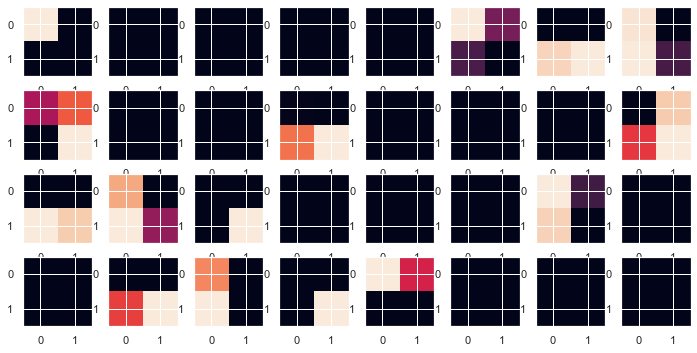

In [42]:
plt.figure(figsize=(12,12))
for i in range(32):
    plt.subplot(8,8,i+1)
    plt.imshow(act[1][0,:,:,i])
plt.savefig("rep_2.png",dpi=1200)